In [1]:
import pandas as pd
import sqlalchemy
import math
import os, sys, copy, random, pickle, cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append("../")

%load_ext autoreload
%autoreload 2

from modules.ControlTracking import TrackFactory
from modules.ControlDisplay import Display
from modules.Interproc import DBInterface, GuiviewState

from modules.AnalysisHelpers import ( 
         exploreImgs, buildImgComparisonData, subprocEval)

from modules.EvalHelpers import EvalTracker, EvalDataset
from modules.ControlEval import EvalFactory
from modules.DataSchemas import ScoreSchema
from modules.EvalHelpers import OutcomeData, DFHelper

from modules.EvalHelpers import AggEval, DFHelper

from modules.EvalSuite import EvalSuite

### Use subproc with logging

In [2]:
tmp_db_path = 'data/misc/books/eval-module-4/evaldb.db'

vid_path = 'data/proc/tmp/dec14/output5.proc1.proc1.avi'

outcome_subproc = subprocEval(f_pathfn = vid_path
                              ,db_pathfn = tmp_db_path 
                              ,b_log = True
                              ,b_eval_log = True
                             )


START - running eval module...
[                            ]
-----------------------------
output db: data/misc/books/eval-module-4/evaldb.db
output tbl: outcome_dataframe
eval time: 5.476
outcome rows: 345 cols: 48 

num frames:                  345 
obj enums scored/tracked:    0,1 / 0 
num scored frames:           19 | 0,9,78...308,324,340 
-------
agg_calcBaselineBallUnitsAway   0.46
agg_checkBothContainsOther      0.42
agg_checkTrackSuccess           1.00
fagg_less_than_20_pix_balls_away   0.53
fagg_less_than_30_pix_success      1.00
-----
subproc time: 13.10


In [3]:
tmp_db_path = 'data/misc/books/eval-module-4/evaldb.db'

vid_path2 = 'data/proc/tmp/dec14/output6.proc1.avi'

outcome_subproc2 = subprocEval(f_pathfn = vid_path2
                              ,db_pathfn = tmp_db_path 
                              ,b_log = True
                              ,b_eval_log = True
                             )


START - running eval module...
[                            ]
------------------------------
output db: data/misc/books/eval-module-4/evaldb.db
output tbl: outcome_dataframe
eval time: 9.769
outcome rows: 383 cols: 48 

num frames:                  383 
obj enums scored/tracked:    0,1 / 0 
num scored frames:           10 | 0,22,40...125,188,380 
-------
agg_calcBaselineBallUnitsAway   0.18
agg_checkBothContainsOther      0.88
agg_checkTrackSuccess           1.00
fagg_less_than_20_pix_balls_away   0.28
fagg_less_than_30_pix_success      1.00
-----
subproc time: 13.43


### Use EvalSuite

In [4]:
from modules.EvalSuite import EvalSuite

In [5]:
suite, suite2 = EvalSuite(), EvalSuite()

suite.buildFromOutcome(outcome_subproc)
suite2.buildFromOutcome(outcome_subproc2)

video / metalog information 

num frames:                  345 
obj enums scored/tracked:    0,1 / 0 
num scored frames:           19 | 0,9,78...308,324,340 
-------

select aggregates 



agg_calcBaselineBallUnitsAway    0.460093
agg_checkBothContainsOther       0.421053
agg_checkTrackSuccess            1.000000
Name: mean, dtype: float64

,mean,n
fagg_less_than_20_pix_balls_away,0.533238,16.0
fagg_less_than_30_pix_success,1.000000,310.0


plotting radius comparison 



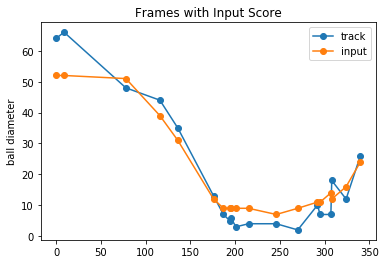

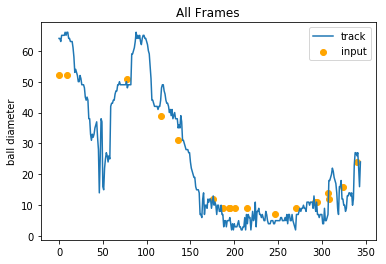


full eval table on input frames 



,calc Baseline Ball Units Away,check Both Contains Other,distance From Baseline,check Track Success,prop Track Radius,check Baseline Inside Track,check Either Contains Other,check Track Inside Baseline,check Track Inside Baseline Rect,compare Radii,prop Baseline Radius
0,0.04,True,2,True,32,True,True,True,False,6,26.0
9,0.14,True,7,True,33,True,True,True,False,7,26.0
78,0.03,True,1,True,24,True,True,True,False,-1,25.0
116,0.12,True,4,True,22,True,True,True,False,3,19.0
136,0.14,True,4,True,17,True,True,True,False,2,15.0
176,0.45,True,5,True,6,True,True,True,False,0,6.0
187,0.67,False,5,True,3,False,False,False,False,-1,4.0
194,0.75,False,6,True,2,False,False,False,False,-2,4.0
195,0.50,False,4,True,3,False,False,False,False,-1,4.0
201,0.52,False,4,True,1,False,False,False,False,-3,4.0



a preview of each eval dataframe


agg_calcBaselineBallUnitsAway    0.460093
agg_checkBaselineInsideTrack     0.421053
agg_checkBothContainsOther       0.421053
Name: mean, dtype: float64

fagg_less_than_20_pix_balls_away    0.533238
fagg_less_than_30_pix_success       1.000000
Name: mean, dtype: float64

,calc Baseline Ball Units Away,check Both Contains Other,distance From Baseline,check Track Success,prop Track Radius,check Baseline Inside Track,check Either Contains Other,check Track Inside Baseline,check Track Inside Baseline Rect,compare Radii,prop Baseline Radius
0,0.04,True,2,True,32,True,True,True,False,6,26.0
9,0.14,True,7,True,33,True,True,True,False,7,26.0
78,0.03,True,1,True,24,True,True,True,False,-1,25.0


,index,input _data0 _0,input _data0 _1,input _data0 _2,input _data0 _3,input _data1 _0,input _data1 _1,input _data1 _2,input _data1 _3,input _data2 _0,...,track _data3 _2,track _data3 _3,track _obj _exists _0,track _obj _exists _1,track _obj _exists _2,track _obj _exists _3,track _obj _type _0,track _obj _type _1,track _obj _type _2,track _obj _type _3
0,0,107.0,111.0,None,None,214.0,218.0,None,None,54.0,...,None,None,True,None,None,None,circle,None,None,None
1,1,NaN,NaN,None,None,NaN,NaN,None,None,NaN,...,None,None,True,None,None,None,circle,None,None,None
2,2,NaN,NaN,None,None,NaN,NaN,None,None,NaN,...,None,None,True,None,None,None,circle,None,None,None


In [6]:
suite.displayFullReport()

### Adding Properties + Calcs to Eval()

In [6]:
from modules.EvalSuite import EvalSuite
from modules.EvalHelpers import DFHelper, OutcomeData

In [7]:
suite = EvalSuite()
suite.buildFromOutcome(outcome_subproc)

In [8]:
eval_df = DFHelper(suite.evalTable)
eval_df.setRowsRequested(s_cmd='inputframes')
eval_df.getDatasetDisplay()

,calc Baseline Ball Units Away,check Both Contains Other,distance From Baseline,check Track Success,prop Track Radius,check Baseline Inside Track,check Either Contains Other,check Track Inside Baseline,check Track Inside Baseline Rect,compare Radii,prop Baseline Radius
0,0.04,True,2,True,32,True,True,True,False,6,26.0
9,0.14,True,7,True,33,True,True,True,False,7,26.0
78,0.03,True,1,True,24,True,True,True,False,-1,25.0
116,0.12,True,4,True,22,True,True,True,False,3,19.0
136,0.14,True,4,True,17,True,True,True,False,2,15.0
176,0.45,True,5,True,6,True,True,True,False,0,6.0
187,0.67,False,5,True,3,False,False,False,False,-1,4.0
194,0.75,False,6,True,2,False,False,False,False,-2,4.0
195,0.50,False,4,True,3,False,False,False,False,-1,4.0
201,0.52,False,4,True,1,False,False,False,False,-3,4.0
